In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Importing Files


In [6]:
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reasons_df = pd.read_csv('reasons.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')

In [8]:
calls_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Unnamed: 7,AHT,AST
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,NaN,0.021528,NaN
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,NaN


# 2. DATA CLEANING

In [12]:
print(calls_df.isnull().sum())


call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
Unnamed: 7                 71810
AHT                        71809
AST                        71810
dtype: int64


In [14]:
calls_df.drop(columns=['Unnamed: 7','AHT','AST'],inplace=True)

In [16]:
print(calls_df.isnull().sum())


call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64


In [18]:
print(customers_df.isnull().sum())

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64


In [20]:
print(reasons_df.isnull().sum())

call_id                0
primary_call_reason    0
dtype: int64


In [22]:
print(sentiment_df.isnull().sum())

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [24]:
# Assuming 0 means no loyalty status->filling missing data
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(0)

In [26]:
customers_df

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,0.0
2,2416856629,Jeffery Dixon,0.0
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,0.0
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,0.0
71808,8095620266,Christine Oneal,1.0


In [28]:
print(customers_df.isnull().sum())


customer_id         0
customer_name       0
elite_level_code    0
dtype: int64


In [30]:
 # Replace NaN with mean sentiment
sentiment_df['average_sentiment'] = sentiment_df['average_sentiment'].fillna(sentiment_df['average_sentiment'].mean())


In [32]:
print(sentiment_df.isnull().sum())

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment            0
silence_percent_average      0
dtype: int64


In [34]:
sentiment_df

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [36]:
# Fill missing agent_tone with the most frequent value (mode)
mode_value = sentiment_df['agent_tone'].mode()[0]
sentiment_df['agent_tone'] = sentiment_df['agent_tone'].fillna(mode_value)


In [38]:
# Check for missing values-> ALl DATA GET CLEANED
print(calls_df.isnull().sum())
print(customers_df.isnull().sum())
print(reasons_df.isnull().sum())
print(sentiment_df.isnull().sum())

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
customer_id         0
customer_name       0
elite_level_code    0
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [40]:
# Check for duplicates
print(calls_df.duplicated().sum())
print(customers_df.duplicated().sum())
print(reasons_df.duplicated().sum())
print(sentiment_df.duplicated().sum())

0
0
0
0


In [42]:
## Converting data_types
# Convert date columns to datetime type
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [44]:
# Convert elite_level_code to categorical type
customers_df['elite_level_code'] = customers_df['elite_level_code'].astype('category')


In [46]:
# Check for any improper data types
print(calls_df.dtypes)
print(customers_df.dtypes)

call_id                             int64
customer_id                         int64
agent_id                            int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
dtype: object
customer_id            int64
customer_name         object
elite_level_code    category
dtype: object


In [48]:
# Handling Outliers
# Calculate AHT and AST
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()/60
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()/60

#AHT average handle time 

In [50]:
print(calls_df[['call_id', 'AHT', 'AST']].head(10))

      call_id   AHT   AST
0  4667960400  31.0   7.0
1  1122072124  12.0   3.0
2  6834291559  19.0   8.0
3  2266439882   7.0   5.0
4  1211603231   9.0  10.0
5  5297766997  24.0   5.0
6   324593040  13.0  13.0
7  8902603117   8.0   8.0
8  7222687732  13.0   8.0
9  4113684017   9.0   8.0


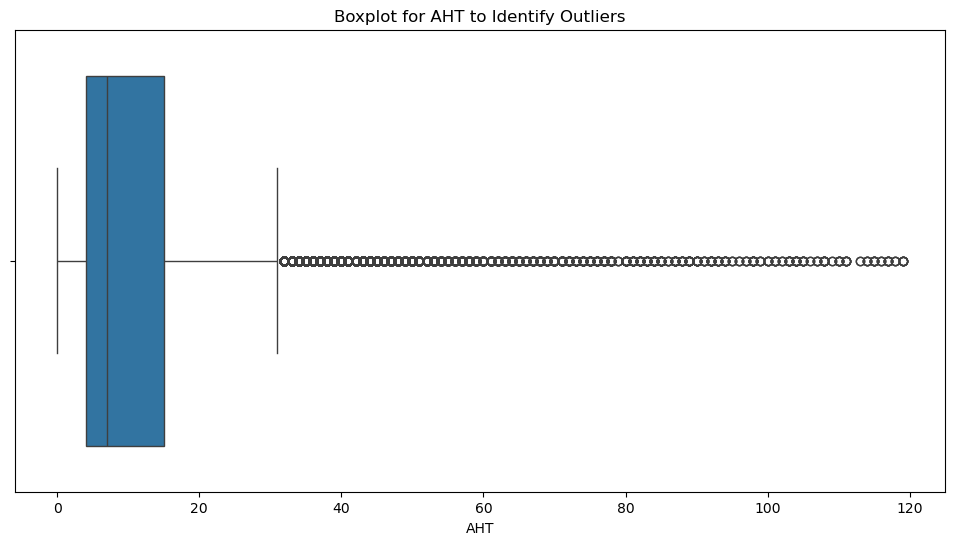

In [52]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AHT'])
plt.title('Boxplot for AHT to Identify Outliers')
plt.show()

In [54]:
# Removing outliers (for instance, using IQR method)
Q1 = calls_df['AHT'].quantile(0.25)
Q3 = calls_df['AHT'].quantile(0.75)
IQR = Q3 - Q1

In [56]:
# Filter out outliers
calls_df = calls_df[~((calls_df['AHT'] < (Q1 - 1.5 * IQR)) | (calls_df['AHT'] > (Q3 + 1.5 * IQR)))]

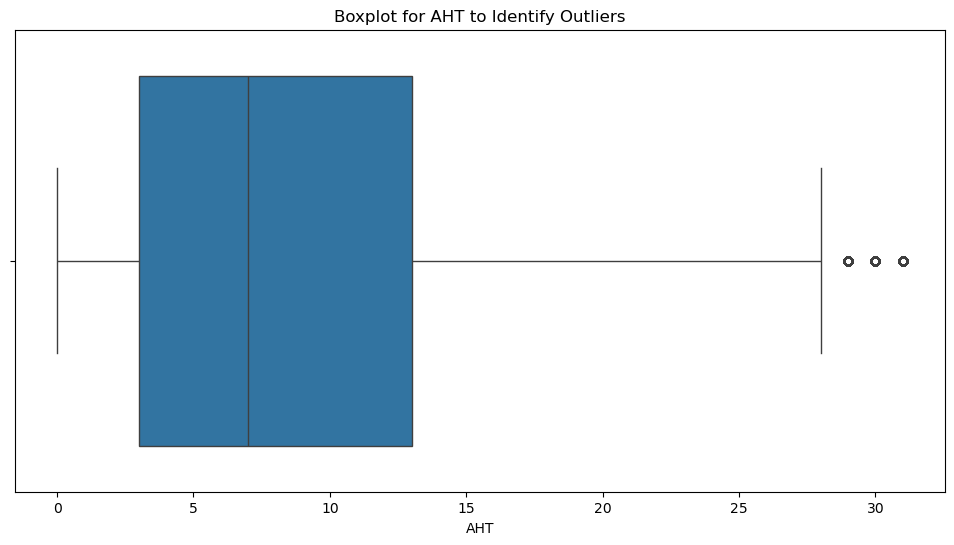

In [58]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AHT'])
plt.title('Boxplot for AHT to Identify Outliers')
plt.show() 

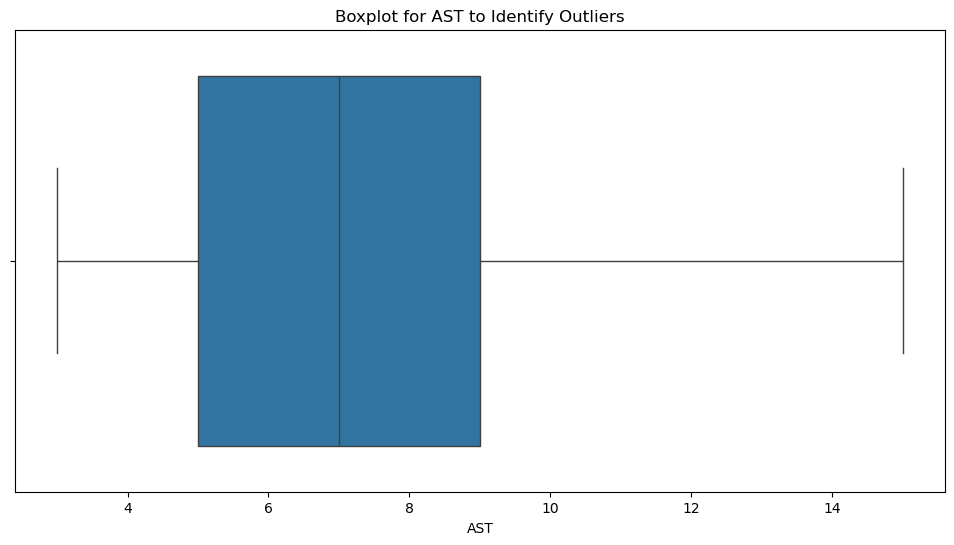

In [60]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AST'])
plt.title('Boxplot for AST to Identify Outliers')
plt.show()

In [66]:
reasons_df.columns

Index(['call_id', 'primary_call_reason'], dtype='object')

In [68]:
# Standardizing call transcripts (convert to lowercase)
calls_df['call_transcript'] = calls_df['call_transcript'].str.lower()

# Clean customer names by stripping whitespace
customers_df['customer_name'] = customers_df['customer_name'].str.strip()

In [70]:
# Final inspection of cleaned data
print(calls_df.info())
print(customers_df.info())
print(reasons_df.info())
print(sentiment_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 66404 entries, 1 to 71809
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  66404 non-null  int64         
 1   customer_id              66404 non-null  int64         
 2   agent_id                 66404 non-null  int64         
 3   call_start_datetime      66404 non-null  datetime64[ns]
 4   agent_assigned_datetime  66404 non-null  datetime64[ns]
 5   call_end_datetime        66404 non-null  datetime64[ns]
 6   call_transcript          66404 non-null  object        
 7   AHT                      66404 non-null  float64       
 8   AST                      66404 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(3), object(1)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null 

In [72]:
# Merging of different CSV files into one single df

In [92]:
merged_df= calls_df.merge(reasons_df, on='call_id', how='left')



In [94]:
merged_df=merged_df.merge(customers_df,on='customer_id',how='left')

In [96]:
merged_df=merged_df.merge(sentiment_df,on='call_id',how='left')

In [98]:
merged_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nagent: thank you for calling united airlin...,12.0,3.0,Booking,Tammy Walters,0.0,519057,calm,neutral,0.02,0.35
1,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nagent: thank you for calling united airlin...,19.0,8.0,IRROPS,Jeffery Dixon,0.0,158319,neutral,polite,-0.13,0.32
2,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nagent: thank you for calling united airlin...,7.0,5.0,Upgrade,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20
3,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nagent: thank you for calling united airlin...,9.0,10.0,Seating,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35
4,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nagent: thank you for calling united airlin...,24.0,5.0,Mileage Plus,Emily Alexander,5.0,817160,calm,calm,0.10,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66399,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nagent: thank you for calling united airlin...,28.0,9.0,Post Flight,Dennis Singleton DDS,0.0,413148,calm,calm,0.05,0.34
66400,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nagent: thank you for calling united airlin...,8.0,3.0,Upgrade,Paul Mitchell,1.0,980156,calm,frustrated,0.03,0.22
66401,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nagent: thank you for calling united airlin...,6.0,6.0,Upgrade,Kaylee Lang,0.0,616988,calm,polite,0.05,0.42
66402,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nagent: thank you for calling united airlin...,4.0,6.0,NaN,Christine Oneal,1.0,161354,neutral,polite,-0.07,0.13


In [100]:
merged_df = merged_df.rename(columns={'agent_id_x': 'agent_id'})

In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66404 entries, 0 to 66403
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  66404 non-null  int64         
 1   customer_id              66404 non-null  int64         
 2   agent_id                 66404 non-null  int64         
 3   call_start_datetime      66404 non-null  datetime64[ns]
 4   agent_assigned_datetime  66404 non-null  datetime64[ns]
 5   call_end_datetime        66404 non-null  datetime64[ns]
 6   call_transcript          66404 non-null  object        
 7   AHT                      66404 non-null  float64       
 8   AST                      66404 non-null  float64       
 9   primary_call_reason      61615 non-null  object        
 10  customer_name            66404 non-null  object        
 11  elite_level_code         66404 non-null  category      
 12  agent_id_y               66404 n

# 3.Exploratory Data Analysis (EDA)

# 3a Univarite Analysis


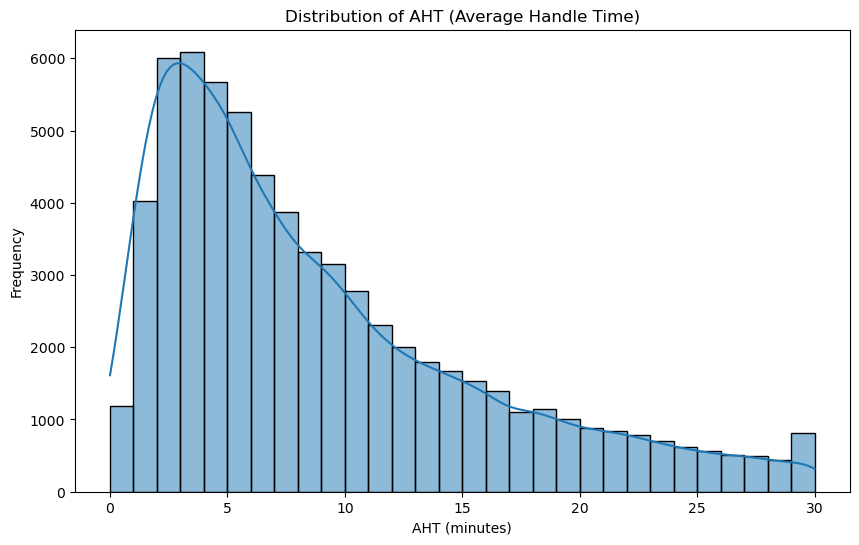

In [106]:
 #Distribution of AHT
plt.figure(figsize=(10,6))
sns.histplot(merged_df['AHT'], kde=True, bins=30)
plt.title('Distribution of AHT (Average Handle Time)')
plt.xlabel('AHT (minutes)')
plt.ylabel('Frequency')
plt.show()

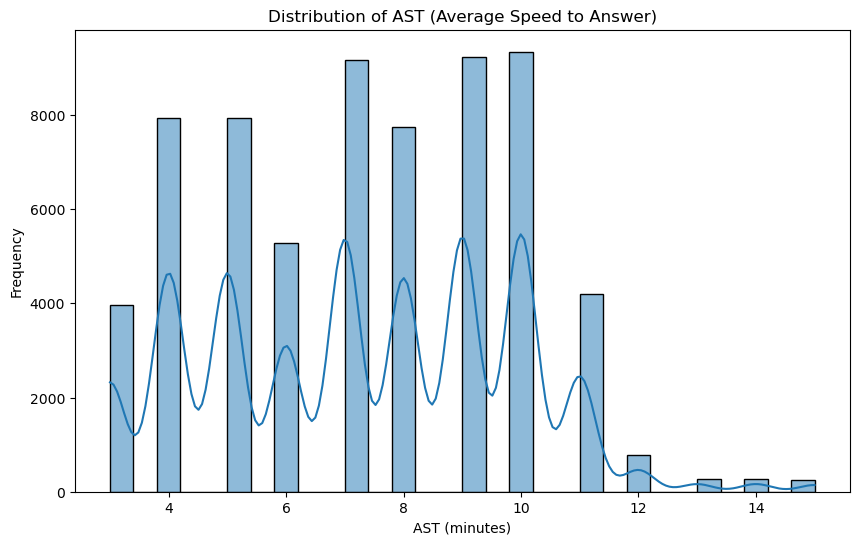

In [108]:
# Distribution of AST
plt.figure(figsize=(10,6))
sns.histplot(merged_df['AST'], kde=True, bins=30)
plt.title('Distribution of AST (Average Speed to Answer)')
plt.xlabel('AST (minutes)')
plt.ylabel('Frequency')
plt.show()

# 3b Bivariate/Multivariate Analysis

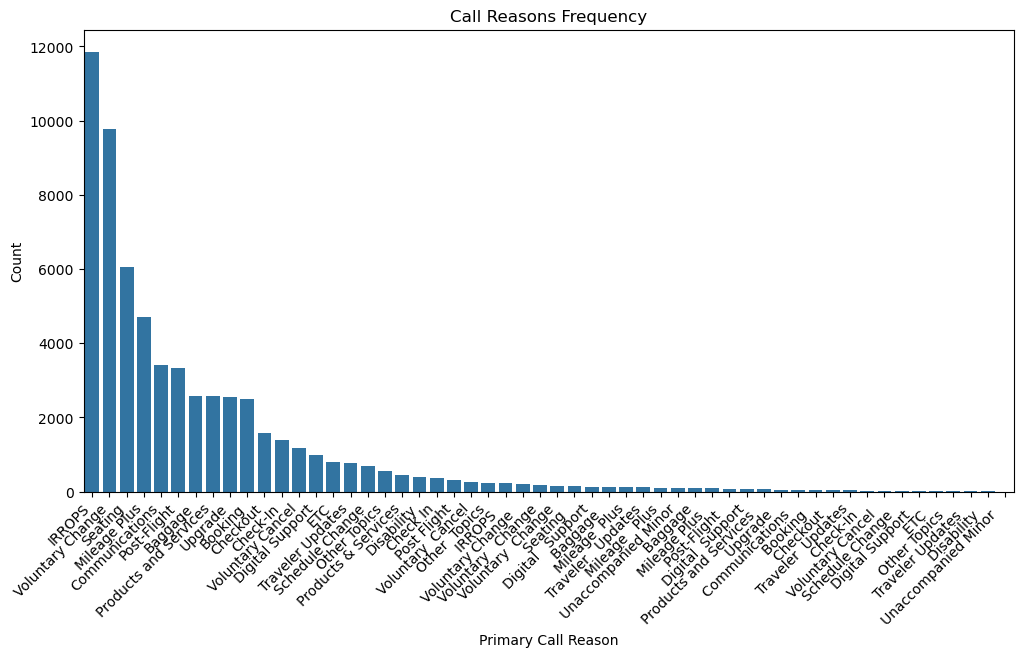

In [111]:
# Analyzing Call Reasons and Their Frequencies
# Plot the frequency of different call reasons
plt.figure(figsize=(12,6))
call_reason_counts = merged_df['primary_call_reason'].value_counts()
sns.barplot(x=call_reason_counts.index, y=call_reason_counts.values)
plt.title('Call Reasons Frequency')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

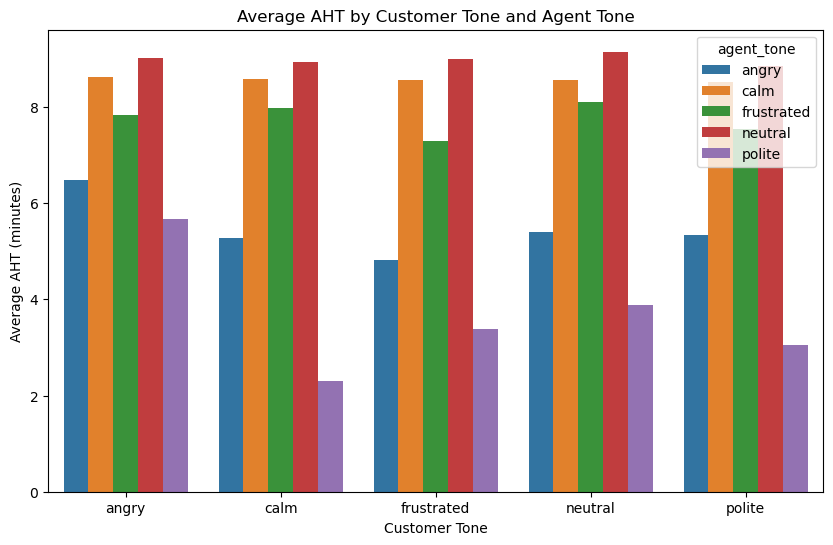

In [113]:
# Sentiment and tone impact on AHT
tone_aht = merged_df.groupby(['customer_tone', 'agent_tone'])['AHT'].mean().reset_index()

# Plot AHT based on customer and agent tone
plt.figure(figsize=(10,6))
sns.barplot(x='customer_tone', y='AHT', hue='agent_tone', data=tone_aht)
plt.title('Average AHT by Customer Tone and Agent Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average AHT (minutes)')
plt.show()

# 3c High-Volume Call Periods


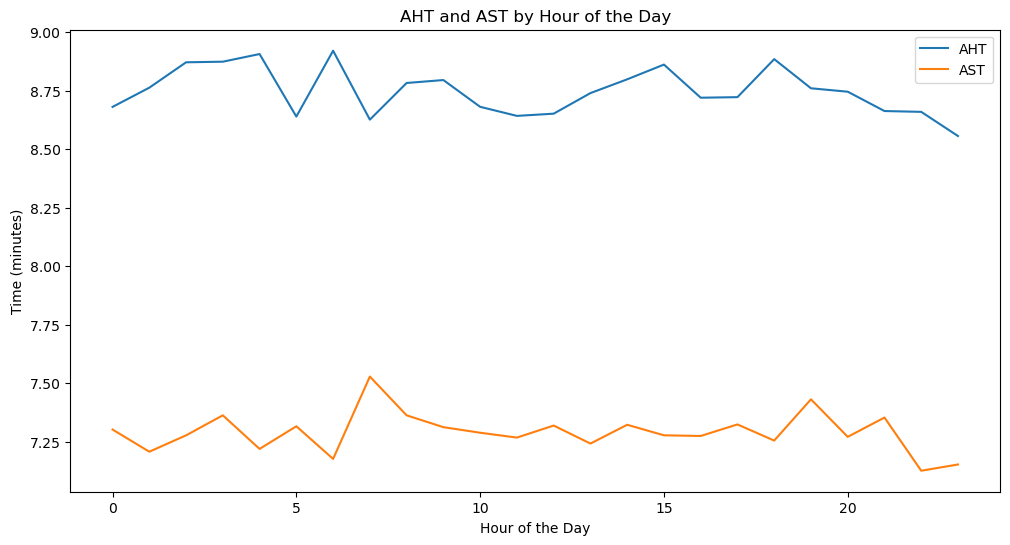

In [116]:
#4.1  Analyzing Call Volume and AHT by Hour
# Add hour column
merged_df['call_start_hour'] = merged_df['call_start_datetime'].dt.hour

# Calculate average AHT and AST per hour
volume_aht = merged_df.groupby('call_start_hour')[['AHT', 'AST']].mean().reset_index()

# Plot AHT and AST by hour
plt.figure(figsize=(12,6))
sns.lineplot(x='call_start_hour', y='AHT', data=volume_aht, label='AHT')
sns.lineplot(x='call_start_hour', y='AST', data=volume_aht, label='AST')
plt.title('AHT and AST by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()

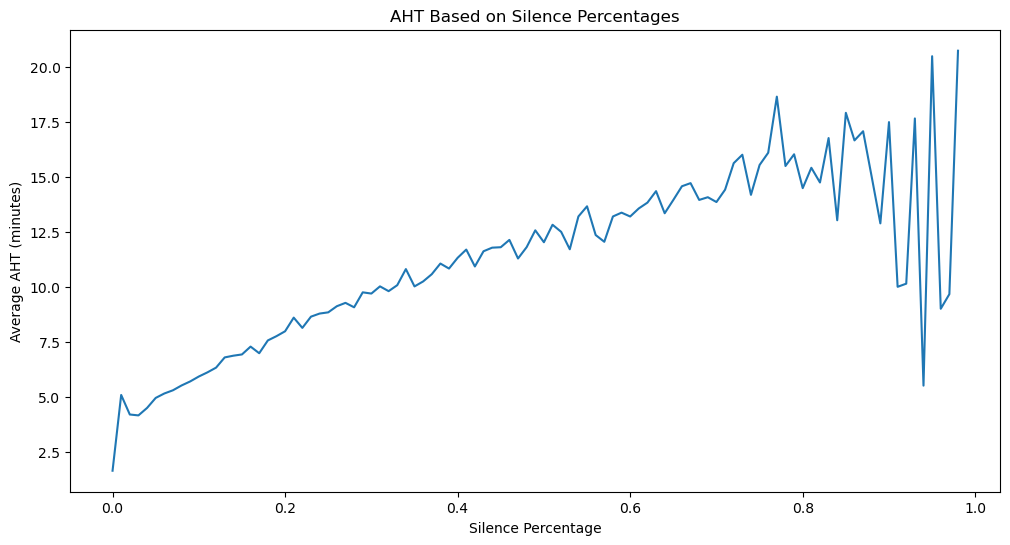

In [118]:
 # Analyzing Silence Percentages
# Calculate the average AHT for different ranges of silence percentage
silence_aht = merged_df.groupby('silence_percent_average')['AHT'].mean().reset_index()

# Plot AHT based on silence percentage
plt.figure(figsize=(12,6))
sns.lineplot(x='silence_percent_average', y='AHT', data=silence_aht)
plt.title('AHT Based on Silence Percentages')
plt.xlabel('Silence Percentage')
plt.ylabel('Average AHT (minutes)')
plt.show()

# 4.Quantifying the Percentage Difference in AHT for Most and Least Frequent Call Reasons:

In [121]:
# 1. Agent Performance Analysis
agent_performance = merged_df.groupby('agent_id')['AHT'].mean().reset_index().sort_values('AHT', ascending=False)
print(agent_performance.head())

     agent_id        AHT
115    384932  22.500000
278    780490  22.500000
125    413148  18.666667
374    980156  18.500000
120    391553  18.000000


In [123]:
# 2. Call Types and AHT
call_reason_aht = merged_df.groupby('primary_call_reason')['AHT'].mean().reset_index().sort_values('AHT', ascending=False)
print(call_reason_aht.head())

   primary_call_reason        AHT
9           Checkout    12.594595
19               ETC    12.437500
8             Checkout  11.695044
23       Mileage  Plus  11.615385
22      Mileage   Plus  11.481818


In [125]:
# 3. Sentiment and Tone Analysis
tone_aht = merged_df.groupby(['customer_tone', 'agent_tone'])['AHT'].mean().reset_index().sort_values('AHT', ascending=False)
print(tone_aht.head(20))

   customer_tone  agent_tone       AHT
18       neutral     neutral  9.146942
3          angry     neutral  9.012677
13    frustrated     neutral  8.997804
8           calm     neutral  8.940082
23        polite     neutral  8.845613
1          angry        calm  8.617389
6           calm        calm  8.588637
16       neutral        calm  8.556638
11    frustrated        calm  8.549351
21        polite        calm  8.514684
17       neutral  frustrated  8.102750
7           calm  frustrated  7.983051
2          angry  frustrated  7.840176
22        polite  frustrated  7.543662
12    frustrated  frustrated  7.296348
0          angry       angry  6.486486
4          angry      polite  5.666667
15       neutral       angry  5.405063
20        polite       angry  5.328947
5           calm       angry  5.283582


In [127]:
# 4. High Volume Call Periods
merged_df['call_start_hour'] = merged_df['call_start_datetime'].dt.hour
volume_aht = (
    merged_df.groupby('call_start_hour')[['AHT', 'AST']]
    .mean()
    .reset_index()
    .sort_values('AHT', ascending=False)
)

print(volume_aht.head())

    call_start_hour       AHT       AST
6                 6  8.920319  7.177291
4                 4  8.906155  7.219980
18               18  8.884384  7.255561
3                 3  8.873482  7.363360
2                 2  8.870868  7.277893


In [129]:
# 5. Silence Percent Impact on AHT
silence_aht = merged_df.groupby('silence_percent_average')['AHT'].mean().reset_index().sort_values('AHT', ascending=False)
print(silence_aht.head())


    silence_percent_average        AHT
98                     0.98  20.750000
95                     0.95  20.500000
77                     0.77  18.658537
85                     0.85  17.923077
93                     0.93  17.666667


In [131]:
# Find the most and least frequent call reasons
call_reason_counts = merged_df['primary_call_reason'].value_counts()
most_frequent_reason = call_reason_counts.index[0]
least_frequent_reason = call_reason_counts.index[-1]

In [133]:
most_frequent_reason

'IRROPS'

In [135]:
least_frequent_reason

'Unaccompanied Minor  '

In [137]:
# Calculate average AHT for most and least frequent call reasons
most_frequent_aht = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
least_frequent_aht = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['AHT'].mean()


In [145]:
# Calculate the percentage difference
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100
print(f"Percentage difference in AHT between the most and least frequent call reasons: {percentage_difference:.2f}%")

Percentage difference in AHT between the most and least frequent call reasons: 227.91%


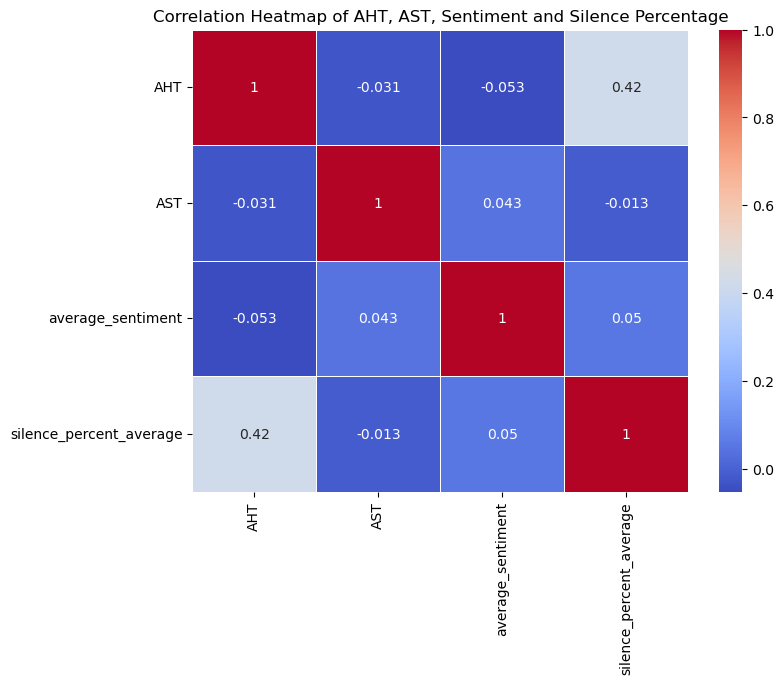

In [148]:
# Select numerical columns for correlation (AHT, AST, sentiment, silence percentage)
corr_matrix = merged_df[['AHT', 'AST', 'average_sentiment', 'silence_percent_average']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of AHT, AST, Sentiment and Silence Percentage')
plt.show()

C:\Users\Hii\AppData\Local\Temp\ipykernel_14092\1488932446.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aht_by_day = merged_df.groupby('call_day')['AHT'].mean().reset_index()


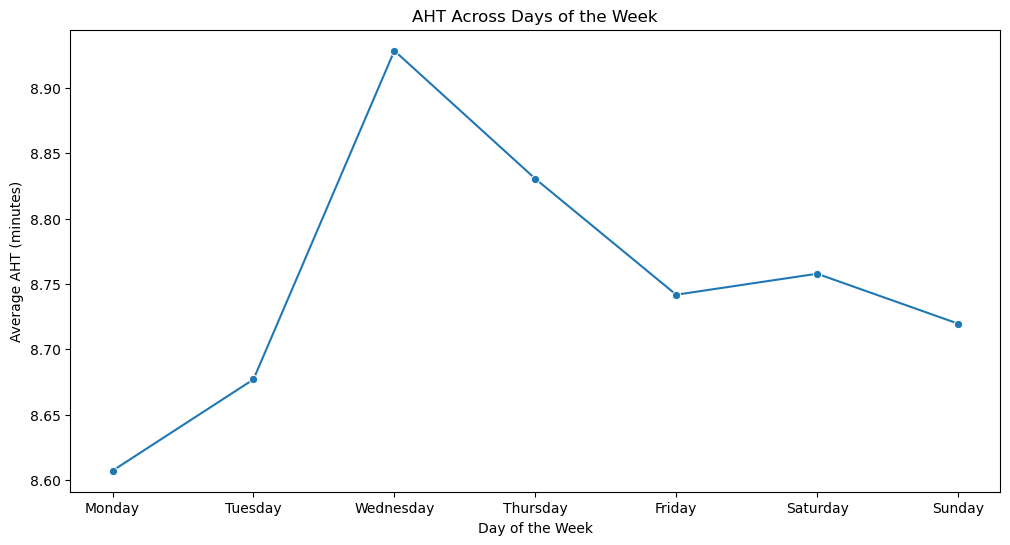

In [153]:
# Create a column for day of week and hour of the day
merged_df['call_day'] = merged_df['call_start_datetime'].dt.day_name()
merged_df['call_hour'] = merged_df['call_start_datetime'].dt.hour

# Aggregate AHT by day of the week
aht_by_day = merged_df.groupby('call_day')['AHT'].mean().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert 'call_day' to a categorical type with the specified order
merged_df['call_day'] = pd.Categorical(merged_df['call_day'], categories=day_order, ordered=True)

# Aggregate AHT by day of the week
aht_by_day = merged_df.groupby('call_day')['AHT'].mean().reset_index()

# Time series plot for AHT by day
plt.figure(figsize=(12,6))
sns.lineplot(x='call_day', y='AHT', data=aht_by_day, marker='o')
plt.title('AHT Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average AHT (minutes)')
plt.show()